<a href="https://colab.research.google.com/github/AuliaVirza101/PCVK/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#dilasi tanpa library
#Dilasi tanpa library

def dilasi_citra(F,w):
  #size image
  p, q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d= cv2.imread('drive/MyDrive/PCVK_2024/Salinan j.jpg',0)

ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5

imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

# TUGAS PRAKTIKUM

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

melihat struktur dari wajah melalui foto KTP

!. Masking Wajah dari KTP

Text(0.5, 1.0, 'Citra Masking')

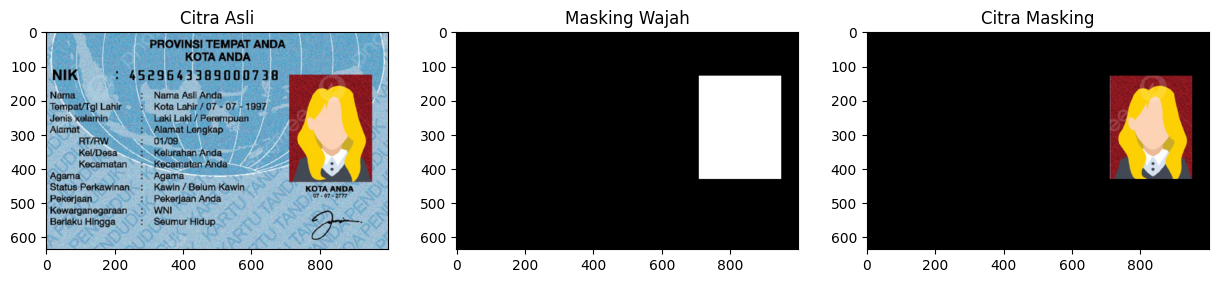

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
ktp = cv.imread('drive/MyDrive/PCVK_2024/KTP.jpg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.rectangle(mask, (710, 130), (950, 430), 255, -1)  # Masking area lain (sesuaikan)

masked_KTP= cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_KTP)
ax[2].set_title('Citra Masking')

Crop image

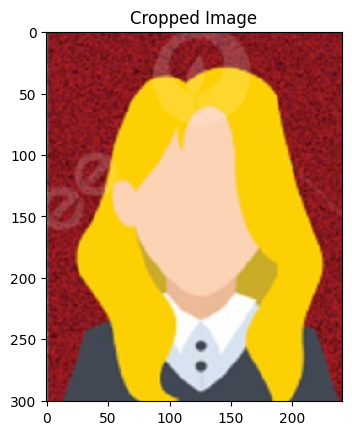

In [28]:
# Find the bounding box of the non-zero (masked) region
x, y, w, h = cv.boundingRect(mask)

# Crop the image using the bounding box
cropped_image = masked_KTP[y:y+h, x:x+w]

# Display the cropped image
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()

Selanjutnya kita buat menjadi grayscale

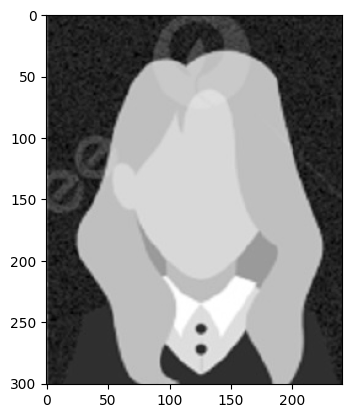

In [54]:
from skimage.morphology import skeletonize
from skimage import filters

img_test = cropped_image.copy()
img_test2 = cv.cvtColor(img_test, cv.COLOR_RGB2GRAY)
#lalu kita coba liat gambar nya

plt.imshow(img_test2, cmap='gray')
# read image
img = img_test2.copy()

#Dilasi tanpa library

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
  imgD[i,j]= np.max(product)
  return imgD

ret, thresh = cv2.threshold(img, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
#-----------------------------------------------------------

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE


ret1, thresh1 = cv2.threshold(img, 175, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
#-----------------------------------------------------------

#operasi Opening  Menggunakan Library
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)
#-----------------------------------------------------------

#operasi Closing Menggunakan Library
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)
#-----------------------------------------------------------

#Operasi Top-Hat
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
                filterSize)

# Applying the Top-Hat operation
tophat = cv2.morphologyEx(img,
              cv2.MORPH_TOPHAT,
              kernel)
#-----------------------------------------------------------



#Operasi BlackHat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#-----------------------------------------------------------


#inverse Skeleton
# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton1 = skeletonize(binary)
#-----------------------------------------------------------

#skeletonize
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0
# skeletonize image
skeleton2 = skeletonize(binary_cp)
#-----------------------------------------------------------



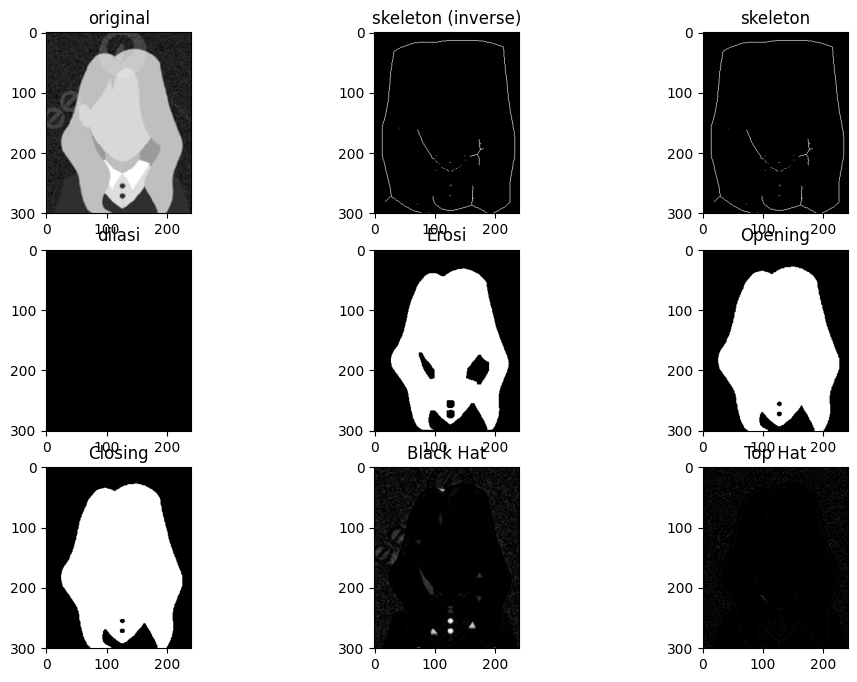

In [55]:
# print images
fig, ax = plt.subplots(3, 3, figsize=(12, 8))


ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('original')

ax[0,1].imshow(skeleton1, cmap='gray')
ax[0,1].set_title('skeleton (inverse)')

ax[0,2].imshow(skeleton2, cmap='gray')
ax[0,2].set_title('skeleton')

ax[1,0].imshow(imgD, cmap='gray')
ax[1,0].set_title('dilasi')

ax[1,1].imshow(imgE, cmap='gray')
ax[1,1].set_title('Erosi')

ax[1,2].imshow(openn, cmap='gray')
ax[1,2].set_title('Opening')

ax[2,0].imshow(closs, cmap='gray')
ax[2,0].set_title('Closing')

ax[2,1].imshow(blackhat, cmap='gray')
ax[2,1].set_title('Black Hat')

ax[2,2].imshow(tophat, cmap='gray')
ax[2,2].set_title('Top Hat')



plt.show()